In [1]:
# Set up dependencies

import pandas as pd
import os as os
import numpy as np
# data visualization library 
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
# Import the raw data into a DataFrame

csvpath = ("data.csv")
Raw_data = pd.read_csv(csvpath)
# Drop the null columns where all values are null
Raw_data = Raw_data.dropna(axis='columns', how='all')
Raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
Raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


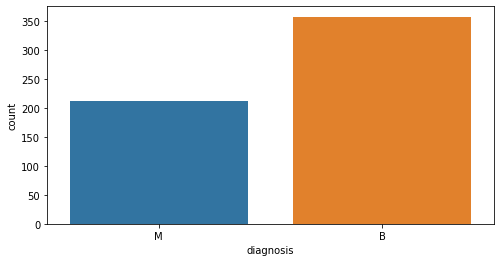

In [4]:
# Count of categories of diagnosis: Benign vs. Malignant
plt.figure(figsize=(8, 4))
sns.countplot(Raw_data['diagnosis'])

# count number of obvs in each class
Benign, Malignant = Raw_data['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', Benign)
print('Number of cells labeled Malignant : ', Malignant)
print('')
print('% of cells labeled Benign', round(Benign / len(Raw_data) * 100, 2), '%')
print('% of cells labeled Malignant', round(Malignant / len(Raw_data) * 100, 2), '%')

In [5]:
# Assign x (attributes) and y (categories of diagnosis) values to explore dataset

# Assign y to the diagnosis values (M or B)

y = Raw_data.diagnosis

# Assign the x to the attributes of the dataset and drop the id and diagnosis as attributes

list = ['id','diagnosis']
x = Raw_data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print(x.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# Generating correlation matrix to test colinearity between attributes

# Generate the correlation matrix
Correlation_coefficient = x.corr().round(2)

Correlation_coefficient.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50


In [8]:
# Save correlation matrix to a pandasdataframe

Correlation_coefficient.to_csv("Correlation.csv")

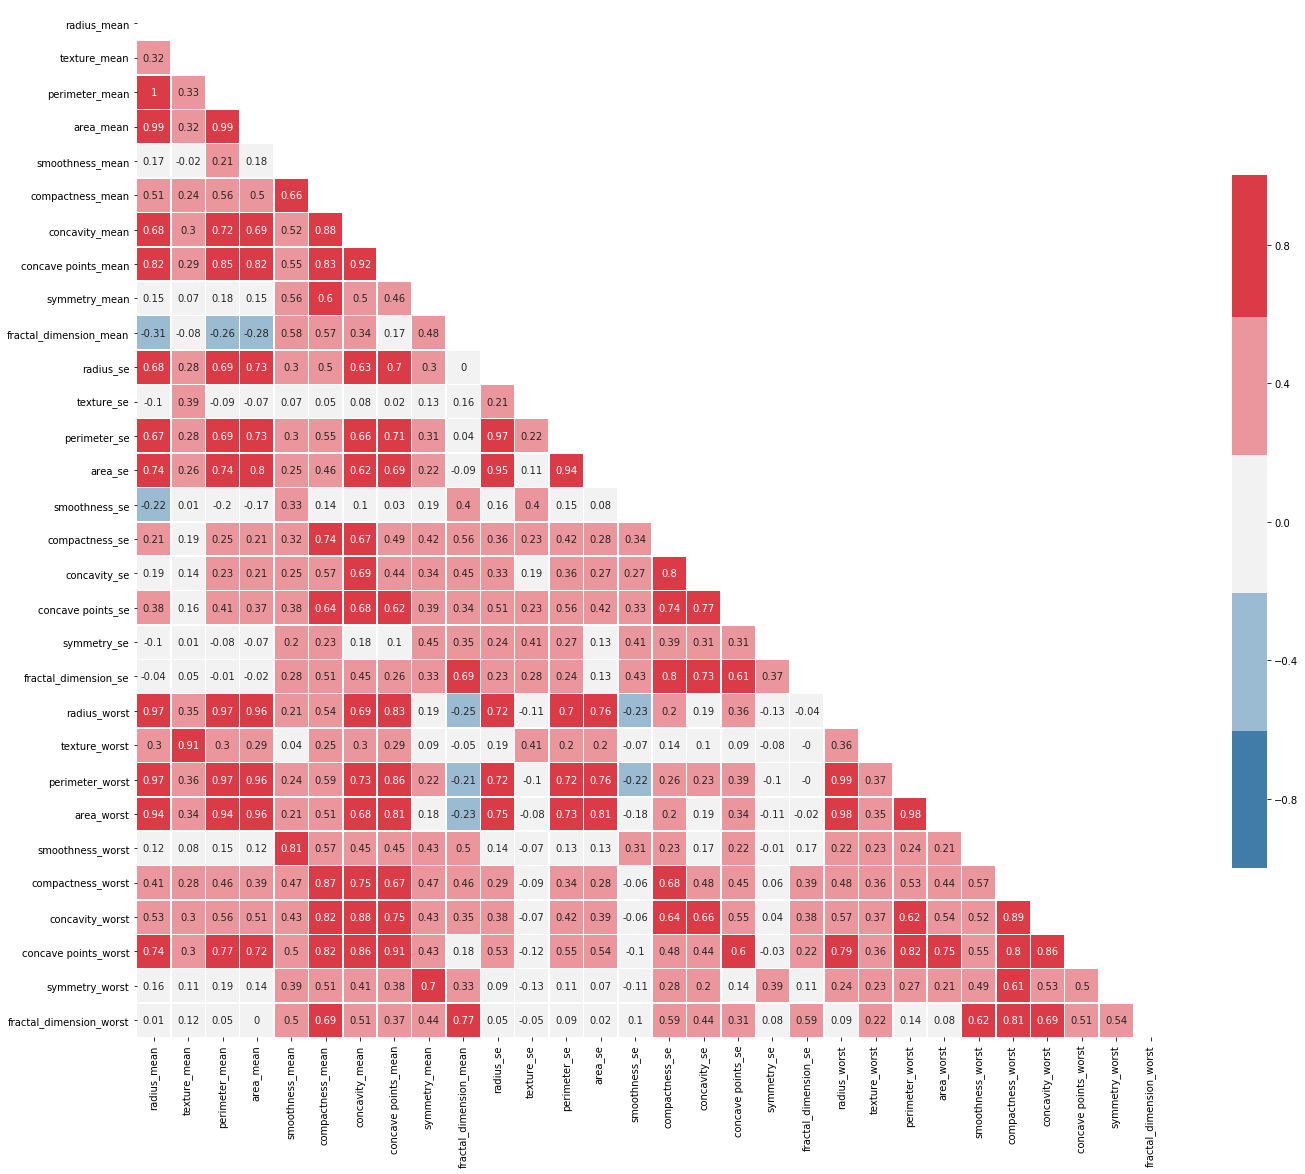

In [9]:
# Visualization of the correlation matrix

# Mask for the upper triangle
Lower_triangle = np.zeros_like(Correlation_coefficient, dtype=np.bool)
Lower_triangle[np.triu_indices_from(Lower_triangle)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

# Define custom colormap
cmap = sns.diverging_palette(240, 10, n= 5)


# Draw the heatmap
sns.heatmap(Correlation_coefficient, mask=Lower_triangle, vmin=-1, vmax=1, cmap = cmap, center=0,
            xticklabels=True, yticklabels=True,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



plt.tight_layout()

From the correlation matrix, we can observe that variables with high correlation (> 0.85) coefficient will likely have linear correlation among them. From the matrix, these are the pairis of variables that have the max correlation:

1) area_mean and radius_mean (0.99)
2) area_mean and perimeter_mean (0.99)
3) concave points_mean and concavity_mean (0.92)
4) perimeter_se and radius_se (0.97)
5) radius_se and area_se (0.95)
6) radius_worst and radius_mean (0.97)
7) radius_worst  and perimeter_mean (0.97)
8) radius_worst vs. area_mean(0.96)
9) texture_worst vs. texture_mean (0.91)
10) perimeter_worst and radius_mean (0.97)
11) perimeter_worst and perimeter_mean (0.97)
12) perimeter_worst and area_mean(0.96)
13) perimeter_worst and radius_worst (0.99)
14) area_worst and radius_mean (0.94)
15) area_worst and perimeter_mean (0.94)
12) area_worst and area_mean(0.96)
13) area_worst and radius_worst (0.98)
14) area_worst and perimeter_worst (0.99)
15) concave points_worst and concave points_mean (0.91)
16) perimeter_worst and concave points_mean (0.86)
17) compactness_worst and compactness_mean(0.87)
18) concavity_worst and concavity_mean (0.88)
19) concave points_worst and concavity_mean (0.86)


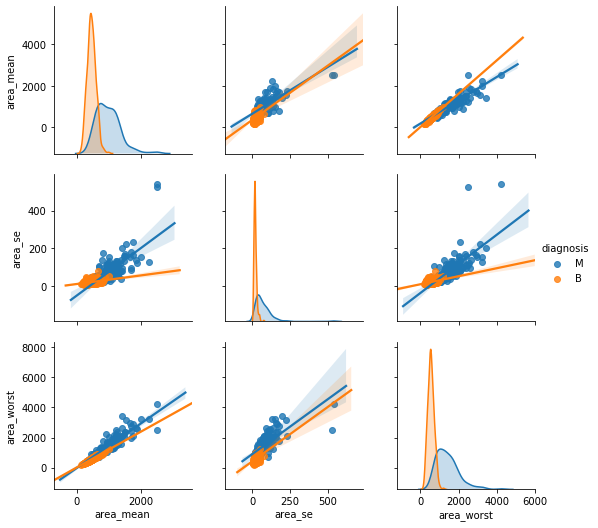

In [10]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: area

cols = ['diagnosis',
        'area_mean','area_se', 'area_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")


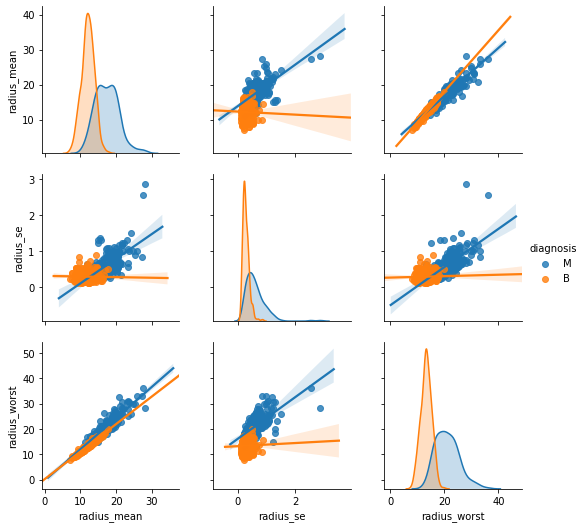

In [11]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: radius

cols = ['diagnosis',
        'radius_mean','radius_se', 'radius_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

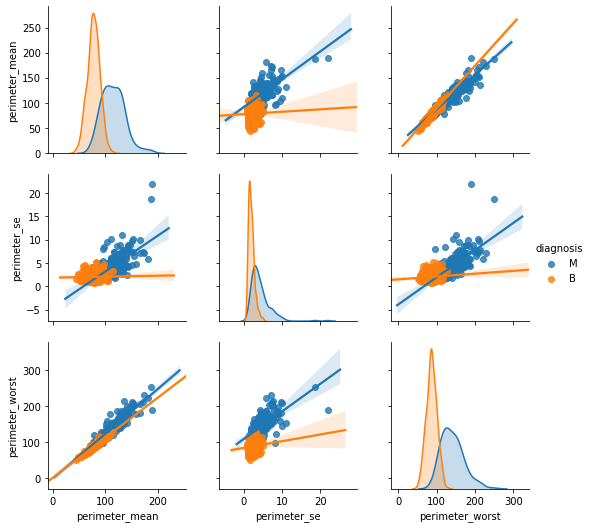

In [12]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: perimeter

cols = ['diagnosis',
        'perimeter_mean', 'perimeter_se', 'perimeter_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

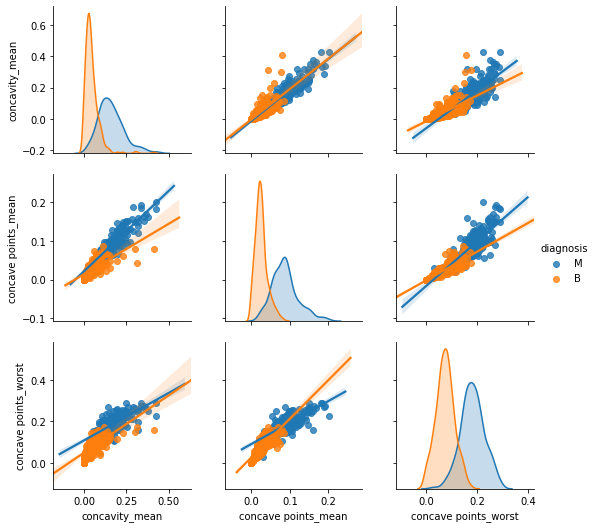

In [13]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Exploring correlation between related attributes: concave

cols = ['diagnosis',
        'concavity_mean','concave points_mean', 'concave points_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

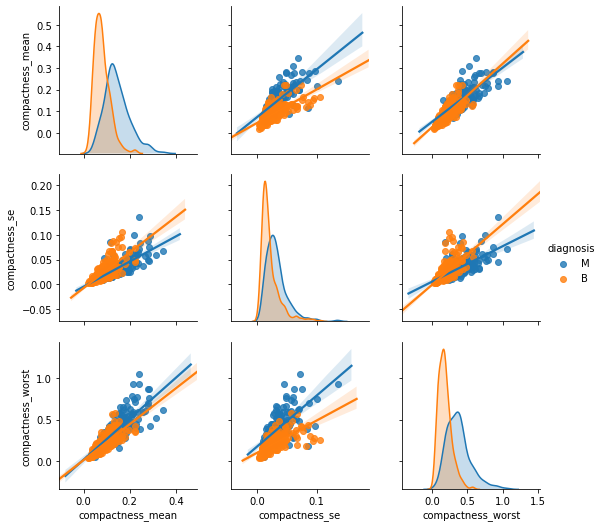

In [14]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Other mean value attributes of the lesion: Compactness

cols = ['diagnosis',
        'compactness_mean', 'compactness_se', 'compactness_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

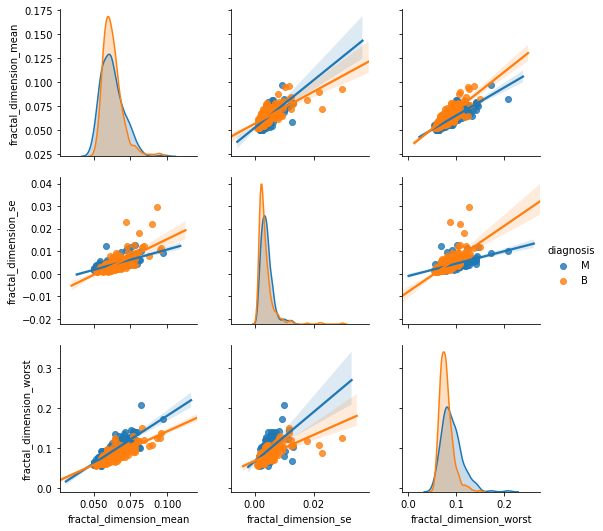

In [15]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Other mean value attributes of the lesion: Compactness

cols = ['diagnosis',
        'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

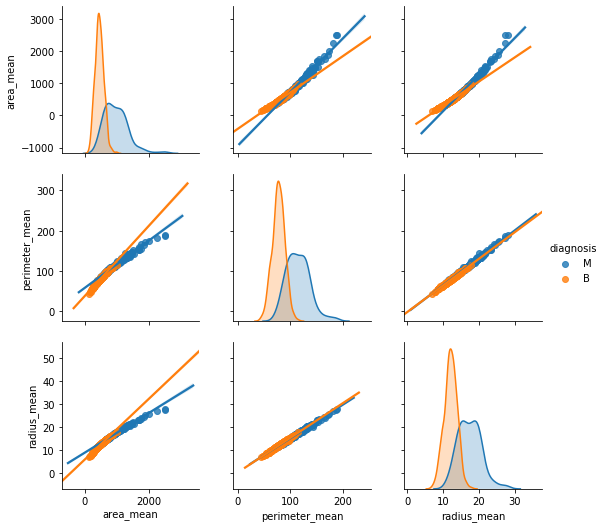

In [16]:
# Generate a distribution and scatter plot matrix with fit linear regression line  for the different attributes: 
# Attributes related to the geometry of the lesion

cols = ['diagnosis',
        'area_mean',  'perimeter_mean', 'radius_mean']
sns.pairplot(data= Raw_data[cols], hue='diagnosis', kind="reg")

From the correlation matrix and visualization analysis we can infer:

1) From the analysis of the correlation matrix, we determine that the following attributes can be removed from the dataset to be used for the Machine Learning:  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','compactness_worst',  'concave points_worst', 'concavity_worst'. They all show high correlation coefficient (> 0.85)

3) In addition, the attributes related to the area of the lesion (area, perimeter, radius) show a high correlation between area_mean and perimeter_mean and radius_mean. The selection might not entirely objective but area_mean might be a better parameter since the radius of the perimeter might be irregular due to the shape of the lesion. Therefore, all attributes rtelated to perimter and radius will also be removed

In [17]:
# Dropping the attributes that showed high correlation coeffecient (>0.85) and removing the ID field

columns_drop = ['id','radius_mean', 'radius_se', 'radius_worst', 'texture_worst', 'perimeter_mean', 'perimeter_se', 
                'perimeter_worst', 'area_worst','compactness_worst',  'concave points_worst', 'concavity_worst']

final_data = Raw_data.drop(columns_drop,axis = 1 )
final_data.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [19]:
# Save final data to a pandasdataframe

final_data.to_csv("final_data.csv", index= False)